# Experiments and tests

In [1]:
from GeneticPGCSOptimizer import GeneticPGCSOptimizer
import matplotlib.pyplot as plt

source_f = "input_corpora/animals_corpus.txt"
eval_f = "input_evaluation/animals_eval.txt"

#New genetic optimizer
genetic_optimizer = GeneticPGCSOptimizer(source_f,eval_f,pop_size = 300,gen_number = 400,select_number = 32,
                                         randomizer = True, cross_proba = 0.5, cross_info_rate = 0.5,
                                         mutation_proba = 0.5, cost_average = False)

#Starting the genetic algorithm of our optimizer
optimal_grid = genetic_optimizer.genetic_algorithm()

####### Genetic Pictogram Grid Communication Optimizer ######

## Optimizer Parameters ##
Source file : input_corpora/animals_corpus.txt     Evaluation file : input_evaluation/animals_eval.txt

  INITIAL POPULATION SIZE : 300

  CROSSOVER RATE : 50.0%

  CROSSOVER INFORMATION RATE : 50.0%

  MUTATION RATE : 50.0%

  NUMBER OF GENERATION : 400




** Optimization **:   0%|                                                              | 0/400 [00:00<?, ?generation/s]

INITIAL GENERATION (0) --> Best fitness : 40462.79702752673



** Optimization **: 100%|████████████████████████████████████████████████████| 400/400 [24:47<00:00,  3.72s/generation]

Best individual --> Generation : 390, Fitness : 40285.5318476517


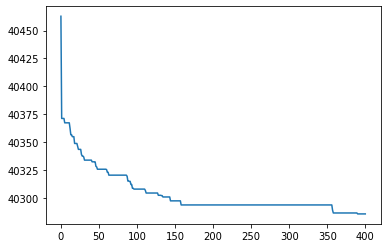

In [10]:
#We get the fitness history (saved during the execution)
history  = genetic_optimizer.fitness_history(option="only_best")

#Display the grid in one image (stored as "default.png")
optimal_grid.display()

#Plot the history
plt.plot(history)
plt.show()